In [1]:
# Feature Selection Notebook
# --------------------------
# ใช้สำหรับเลือก features ที่สัมพันธ์กับ target (t2m_forecast_7d)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler

In [2]:
# 1. โหลด Dataset
df = pd.read_csv(r'../Dataset/nasa_power_prepared_data.csv')  
df = df.sort_values("date")

In [3]:
# 2. กำหนด Target และ Columns ที่จะตัดออก
TARGET_COL = "t2m_forecast_7d"
DROP_TARGETS = [
    "rain_forecast_7d",
    "et_forecast_7d",
    "soil_moisture_forecast_7d",
    "wind_forecast_7d"
]
DROP_COLS = ["date", "day", "week", "weekday"]

In [4]:
# 3. เลือก Features
features = [
    col for col in df.columns
    if col not in DROP_TARGETS + DROP_COLS + [TARGET_COL]
]

print(f"Dataset shape: {df.shape}")
print(f"Target: {TARGET_COL}")
print(f"Features count: {len(features)}")

Dataset shape: (16385, 77)
Target: t2m_forecast_7d
Features count: 68


In [5]:
# 4. Correlation Matrix
correlation_data = df[features + [TARGET_COL]]
correlation_matrix = correlation_data.corr()

target_correlations = correlation_matrix[TARGET_COL].abs().sort_values(ascending=False)

# เลือก features ที่มี correlation > 0.3
selected_features_corr = target_correlations[target_correlations > 0.3].index.tolist()
if TARGET_COL in selected_features_corr:
    selected_features_corr.remove(TARGET_COL)

print("\nFeatures selected by correlation (>0.3):")
print(selected_features_corr)


Features selected by correlation (>0.3):
['tsoil3', 'tsoil2', 'ts', 'tsoil1', 'tsurf', 't2m', 'tsoil4', 't10m', 't2m_max', 't10m_max', 'v2m', 'v10m', 't2m_min', 't10m_min', 'v50m', 'ts_min', 'rhoa', 'ts_max', 'z0m', 't2mwet', 'month', 'gwetprof', 'gwetroot', 'gwettop', 'tsoil5', 'wd50m', 'wd2m', 'wd10m', 'evptrns', 'et_total', 'to3', 'evland', 'u50m', 'u10m', 'u2m', 'slp', 'ps', 'qv10m']


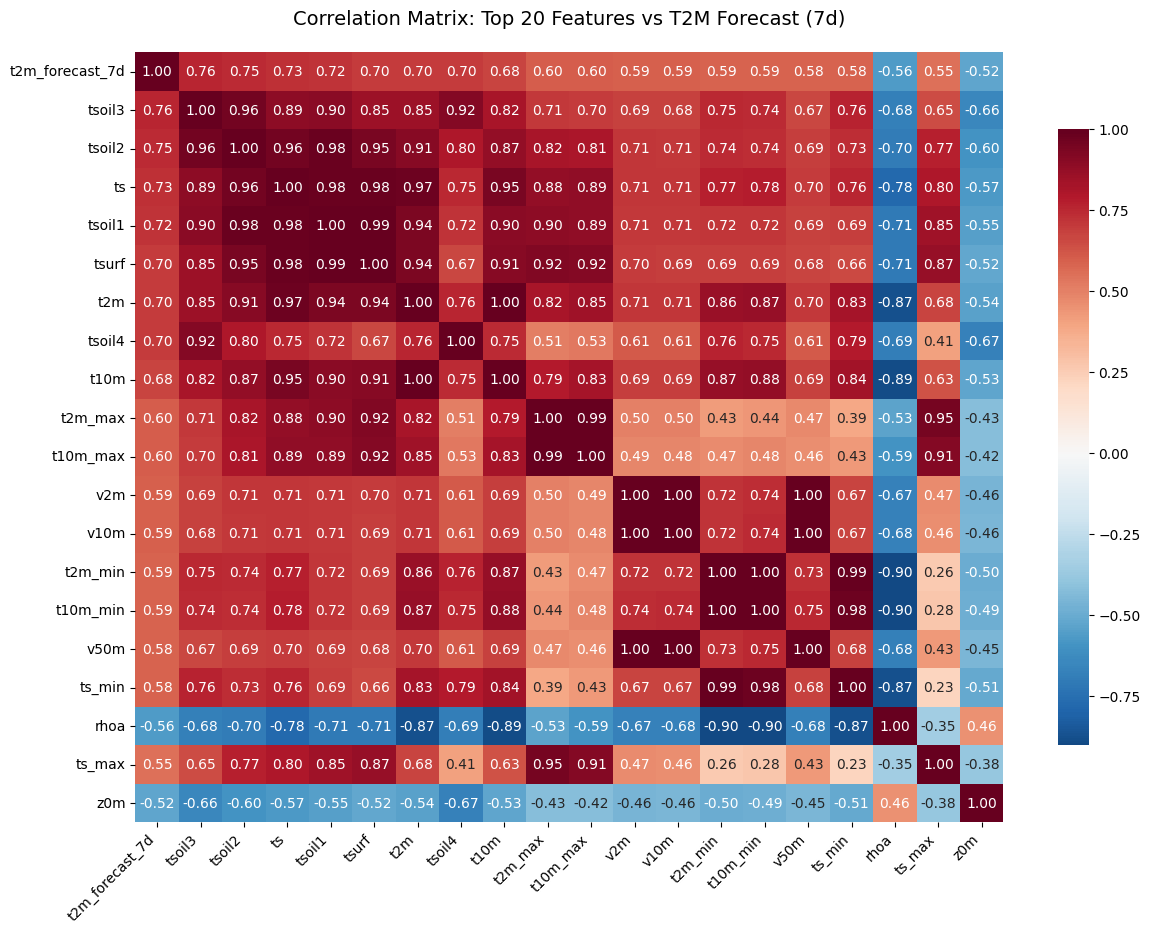

In [6]:
# 5. Heatmap ของ Top Features
top_features_for_heatmap = target_correlations.head(20).index.tolist()

plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix.loc[top_features_for_heatmap, top_features_for_heatmap],
    annot=True, cmap="RdBu_r", center=0, fmt=".2f", cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix: Top 20 Features vs T2M Forecast (7d)", fontsize=14, pad=20)
plt.xticks(rotation=45, ha="right")
plt.show()

In [ ]:
# 6. Mutual Information
X = df[selected_features_corr]
y = df[TARGET_COL]

X_scaled = StandardScaler().fit_transform(X)
mi_scores = mutual_info_regression(X_scaled, y)
mi_series = pd.Series(mi_scores, index=selected_features_corr).sort_values(ascending=False)

print("\nMutual Information scores:")
print(mi_series)


Mutual Information scores:
tsoil3      0.539200
tsoil2      0.519762
month       0.476877
tsoil1      0.471942
ts          0.456534
t2m         0.421079
tsurf       0.420635
tsoil4      0.417610
t10m        0.386011
t10m_max    0.301677
t2m_max     0.289939
t2m_min     0.283281
t10m_min    0.275766
ts_min      0.270037
ts_max      0.262052
wd2m        0.252799
wd10m       0.250177
gwetprof    0.243151
wd50m       0.235771
v2m         0.234084
gwetroot    0.229282
v10m        0.229144
gwettop     0.219965
v50m        0.219857
t2mwet      0.219720
z0m         0.207408
rhoa        0.200527
tsoil5      0.192989
u50m        0.185902
evptrns     0.176770
u10m        0.171774
u2m         0.164503
et_total    0.153263
to3         0.138597
evland      0.123944
slp         0.099277
ps          0.098311
qv10m       0.093394
dtype: float64


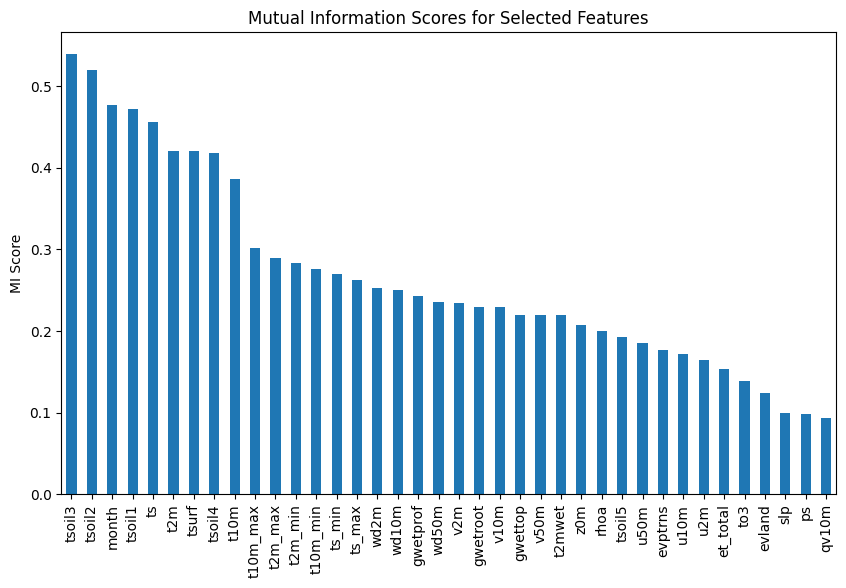

In [ ]:
# 7. Plot MI Scores
plt.figure(figsize=(10, 6))
mi_series.plot(kind="bar")
plt.title("Mutual Information Scores for Selected Features")
plt.ylabel("MI Score")
plt.show()

In [ ]:
# เลือก top 10 features จาก MI scores
top_features = mi_series.head(15).index.tolist()
print("Top features for modeling:", top_features)

Top features for modeling: ['tsoil3', 'tsoil2', 'month', 'tsoil1', 'ts', 't2m', 'tsurf', 'tsoil4', 't10m', 't10m_max', 't2m_max', 't2m_min', 't10m_min', 'ts_min', 'ts_max']
